In [1]:
import os
import glob
from astropy.table import Table, hstack, vstack

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
import os
import sys
import glob
import pickle

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib.pyplot as plt
params = {
    'font.family'        : 'lmodern',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

from matplotlib.colors import ListedColormap
parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]

# Package to save multiple PDF pages in one PDF
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
if sys.argv[1] == '-f':
    print('You are running the Cannon in IPYNB mode')
    version_cannon = 'Cannon3.0.1'
    setup_cannon   = 'SMEmasks_it1'
    reduction_DR   = 'dr5.2'
    print(version_cannon,reduction_DR)
else:
    print('You are running the Cannon in PY mode')
    version_cannon = sys.argv[1]
    setup_cannon   = sys.argv[2]
    reduction_DR   = sys.argv[3]

# Change Work directory (if Sven's computer)
try:
    localFilePath = '/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/'+reduction_DR+'/'+version_cannon+'/fits_files/'
    os.chdir(localFilePath)
    print('Current working directory: '+os.getcwd())
except:
    print('Could not change Path to '+localFilePath)

You are running the Cannon in IPYNB mode
Cannon3.0.1 dr5.2
Current working directory: /shared-storage/buder/svn-repos/trunk/GALAH/CANNON/dr5.2/Cannon3.0.1/fits_files


In [3]:
include_sme = False

fits_files = glob.glob(version_cannon+'_'+setup_cannon+'*.fits')
fits_files.sort()
# remove last entry == training set
fits_files = fits_files[:-1]

if include_sme == True:
    print('You are including the SME data')
    
    trainingset_filename = glob.glob('*trainingset.fits')
    if len(trainingset_filename) == 0:
        sys.exit('No training set?!')
    else:
        print('Read in '+trainingset_filename[0])
        trainingset = Table.read(trainingset_filename[0], format='fits')

    # COMBINED will be the final table, starting from the training set
    combined = trainingset
    
else:
    print('You are not including the SME data')
    combined = Table.read(fits_files[0], format='fits')
    fits_files = fits_files[1:]

You are not including the SME data


In [4]:
print('Start combining trainingset and testset')
print('Sobject_ids in trainingset: '+str(len(combined['sobject_id'])))

# Step by step, we are appending the testset whenever the sobject_id was not run as part of the trainingset
for each_fits in fits_files:
    print('Appending '+each_fits)
    testset_each = Table.read(each_fits, format='fits')
    if include_sme == True:
        not_in_trainingset = np.array([testset_each['sobject_id'][index] not in trainingset['sobject_id'] for index in range(len(testset_each['sobject_id']))])  
        combined = vstack([combined, testset_each[not_in_trainingset]])
        print('Appending '+str(len(np.where(not_in_trainingset == True)[0]))+' sobject_ids')
    else:
        combined = vstack([combined, testset_each])
        print('Appending '+str(len(testset_each['sobject_id']))+' sobject_ids')
print('Finished, Nr. of sobject_ids: '+str(len(combined['sobject_id'])))

Start combining trainingset and testset
Sobject_ids in trainingset: 299
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131122.fits
Appending 137 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131123.fits
Appending 1095 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131216.fits
Appending 900 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131217.fits
Appending 1245 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131219.fits
Appending 1 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_131222.fits
Appending 352 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_140111.fits
Appending 569 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_140112.fits
Appending 529 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_140113.fits
Appending 304 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_140114.fits
Appending 745 sobject_ids
Appending Cannon3.0.1_SMEmasks_it1_dr5.2_4ccds_140115.fits
Appending 388 sobje

In [5]:
"""
In this cell we could load in the raw-raw trainingset (before the Cannon step)
to include also all stars actually run with SME, but flagged because of this or that reason
similar for the Cannon iteration.

We can even include a flag in trained_on, signalising why we took it out (He-rich, binary etc.)
"""

'\nIn this cell we could load in the raw-raw trainingset (before the Cannon step)\nto include also all stars actually run with SME, but flagged because of this or that reason\nsimilar for the Cannon iteration.\n\nWe can even include a flag in trained_on, signalising why we took it out (He-rich, binary etc.)\n'

In [6]:
wg3_wg4_setup = dict(
    version_reduction  = 'sobject_iraf_52_171009',
    reduction_DR       = reduction_DR,
    version_sme        = 'SME360_DR2_SVN331',
    version_cannon     = version_cannon,
    setup_cannon       = 'SMEmasks_it1',
    nr_ccds_cannon     = 4,
    stellar_parameters = ['Teff', 'Logg', 'Feh', 'Vmic', 'Vsini', 'Ak'],
    elements           = [
                         'Li',  'C',  'O', 'Na', 'Mg', 'Al', 'Si',  'K', 'Ca', 'Sc', 
                         'Ti',  'V', 'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Zn', 'Rb', 'Sr',
                          'Y', 'Zr', 'Mo', 'Ru', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Eu'
                         ]
    )

In [7]:
export_order = []

# General
for each_label in [
    'sobject_id','galah_id','field_id','ra','dec','ebv','snr_c1_iraf','snr_c2_iraf','snr_c3_iraf','snr_c4_iraf',
    'red_flag','teff_guess','logg_guess','feh_guess','rv_guess','e_rv_guess','flag_guess'
    ]:
    export_order.append(each_label)

# General Cannon
for each_label in [
    'chi2_cannon','sp_label_distance','flag_cannon','Alpha_fe_cannon','e_Alpha_fe_cannon'
    ]:
    export_order.append(each_label)



# Cannon Stellar parameters
for each_sp in wg3_wg4_setup['stellar_parameters']:
    export_order.append(each_sp+'_cannon')
    export_order.append('e_'+each_sp+'_cannon')
    
for each_elem in wg3_wg4_setup['elements']:
    export_order.append(each_elem+'_abund_cannon')
    export_order.append('e_'+each_elem+'_abund_cannon')
    export_order.append('ld_'+each_elem+'_abund_cannon')
    export_order.append('flag_'+each_elem+'_abund_cannon')
    export_order.append('sn_'+each_elem+'_abund_cannon')
    export_order.append('chi2_'+each_elem+'_abund_cannon')
            
final_cols = []

for each_label in export_order:
    final_cols.append(pyfits.Column(name=each_label, array=combined[each_label], format=combined[each_label].dtype))
       
cols = pyfits.ColDefs(final_cols)
tbhdu = pyfits.BinTableHDU.from_columns(cols)

tbhdu.writeto('sobject_iraf_'+version_cannon.lower()+'.fits', clobber=True)

In [8]:
# Convert IPYNB to PY

os.chdir('/shared-storage/buder/svn-repos/trunk/GALAH/TheGALAHCannon/')

convert_command = 'ipython nbconvert --to script Cannon_stack_fits.ipynb'
os.system(convert_command)

os.chdir('/shared-storage/buder/svn-repos/trunk/GALAH/')

In [9]:
# Finished, so import again and adjust units and description
data,header = pyfits.getdata('/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/'+reduction_DR+'/'+version_cannon+'/fits_files/sobject_iraf_'+version_cannon.lower()+'.fits', header=True)

header_comments = np.array([
    # General
     ['sobject_id'       , ''          , 'GALAH internal FITS ID of spectrum'],
     ['galah_id'         , ''          , 'GALAH internal ID of star'],
     ['field_id'         , ''          , 'GALAH internal field ID'],
     ['2MASS   '         , ''          , '2MASS ID'],
     ['ra'               ,  'deg'       , 'Right ascension [deg] for J2000.'],
     ['dec'              , 'deg'       , 'Declination [deg] for J2000.'],
     ['ebv'              , 'mag'       , 'E(B-V) from SFD98'],
     ['snr2_c1_iraf'     , ''          , 'CCD1 SNR of iraf w/ error spectra'],
     ['snr2_c2_iraf'     , ''          , 'CCD2 SNR of iraf w/ error spectra (reference for papers)'],
     ['snr2_c3_iraf'     , ''          , 'CCD3 SNR of iraf w/ error spectra'],
     ['snr2_c4_iraf'     , ''          , 'CCD4 SNR of iraf w/ error spectra'],
     ['red_flag'         , ''          , 'Flag of reduction pipeline'],
     ['teff_guess'       , 'K'         , 'Best effective temperature [K] from GUESS'],
     ['logg_guess'       , 'dex'       , 'Best surface gravity [dex] from GUESS'],
     ['feh_guess'        , 'dex'       , 'Best metallicity [dex] from GUESS'],
     ['rv_guess'         , 'km/s'      , 'Best radial velocity (3 CCDs) [km/s] from GUESS'],
     ['e_rv_guess'       , 'km/s'      , 'Radial velocity standard deviation [km/s] from GUESS'],
     ['flag_guess'       , ''          , 'Flag from GUESS, see documentation for explanation'],
    # COMMENT
     ['Teff_cannon'      , 'K'         , 'Effective temperature [K]'],
     ['e_Teff_cannon'    , 'K'         , 'Error of effective temperature [K]'],
     ['Logg_cannon'      , 'dex'       , 'Surface gravity [dex]'],
     ['e_Logg_cannon'    , 'dex'       , 'Error of surface gravity [dex]'],
     ['Feh_cannon'       , 'dex'       , 'Metallicity [dex]'],
     ['e_Feh_cannon'     , 'dex'       , 'Error of metallicity [dex]'],
     ['Vmic_cannon'      , 'km/s'      , 'Microturbulence velocity [km/s]'],
     ['e_Vmic_cannon'    , 'km/s'      , 'Error of microturbulence velocity [km/s]'],
     ['Vsini_cannon'     , 'km/s'      , 'Rotational velocity [km/s]'],
     ['e_Vsini_cannon'   , 'km/s'      , 'Error of rotational velocity [km/s]'],
     ['chi2_cannon'      , ''          , 'Summed chi2 of fit for all pixels'],
     ['sp_label_distance', ''          , 'Mean sum of precision-weighted label-distance (teff,logg,feh,vsini) to 10 closest training set points'],
     ['flag_cannon'      , ''          , 'Flag of The Cannon, see comments for explanation'],
     ['Alpha_fe_cannon'  , 'dex'       , 'Error-weighted alpha-process enhancement'],
     ['e_Alpha_fe_cannon', 'dex'       , 'Error of error-weighted alpha-process enhancement'],
])

for each in range(1,len(header['TTYPE*'])+1):
    for comm in range(len(header_comments)):
        if header['TTYPE'+str(each)] == header_comments[comm,0]:
            header.set('TUNIT'+str(each),header_comments[comm,1])
            header.set('TCOMM'+str(each),header_comments[comm,2])
    for xfe in wg3_wg4_setup['elements']:
        if header['TTYPE'+str(each)] == xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'['+xfe+'/Fe] of '+wg3_wg4_setup['version_cannon'])
            header.set('TUNIT'+str(each),'dex')
        if header['TTYPE'+str(each)] == 'e_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Error for ['+xfe+'/Fe] of '+wg3_wg4_setup['version_cannon'])
            header.set('TUNIT'+str(each),'dex')
        if header['TTYPE'+str(each)] == 'flag_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Flag for ['+xfe+'/Fe] of '+wg3_wg4_setup['version_cannon']+' (use only flag == 0)')
            header.set('TUNIT'+str(each),'')
        if header['TTYPE'+str(each)] == 'ld_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Maximum norm. line depth for '+xfe)
            header.set('TUNIT'+str(each),'')
        if header['TTYPE'+str(each)] == 'depth_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Maximum line depth within mask of '+xfe)
            header.set('TUNIT'+str(each),'')
        if header['TTYPE'+str(each)] == 'sn_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Mean S/N within line mask of '+xfe)
            header.set('TUNIT'+str(each),'')
        if header['TTYPE'+str(each)] == 'chi2_'+xfe+'_abund_cannon':
            header.set('TCOMM'+str(each),'Mean chi2 of The Cannon within line mask of '+xfe)
            header.set('TUNIT'+str(each),'')
            
header['COMMENT'] = '--- WG3+WG4 information ---'            
header['COMMENT'] = 'version_reduction:'
header['COMMENT'] = wg3_wg4_setup['version_reduction']
header['COMMENT'] = 'reduction_DR:'
header['COMMENT'] = wg3_wg4_setup['reduction_DR']
header['COMMENT'] = 'version_sme:'
header['COMMENT'] = wg3_wg4_setup['version_sme']
header['COMMENT'] = 'version_cannon:'
header['COMMENT'] = wg3_wg4_setup['version_cannon']
header['COMMENT'] = 'setup_cannon:'
header['COMMENT'] = wg3_wg4_setup['setup_cannon']
header['COMMENT'] = 'nr_ccds_cannon:'
header['COMMENT'] = str(wg3_wg4_setup['nr_ccds_cannon'])
header['COMMENT'] = ' '
header['COMMENT'] = 'Bitmask of red_flag:'
header['COMMENT'] = ' 0 == no flag'
header['COMMENT'] = ' 1 == bad wavelength solution in ccd_1'
header['COMMENT'] = ' 2 == bad wavelength solution in ccd_2'
header['COMMENT'] = ' 4 == bad wavelength solution in ccd_3'
header['COMMENT'] = ' 8 == bad wavelength solution in ccd_4'
header['COMMENT'] = '16 == molecfit fail in ccd_3'
header['COMMENT'] = '32 == molecfit fail in ccd_4'
header['COMMENT'] = '64 == twilight flat'
header['COMMENT'] = ' '
header['COMMENT'] = 'Bitmask of flag_guess:'
header['COMMENT'] = ' 0 == no flag'
header['COMMENT'] = ' 1 == low SNR flag'
header['COMMENT'] = ' 2 == bad weights flag'
header['COMMENT'] = ' 4 == bad continuum flag'
header['COMMENT'] = ' 8 == SP grid outlier flag'
header['COMMENT'] = ' '
header['COMMENT'] = 'Bitmask of flag_cannon:'
header['COMMENT'] = ' 0 == no flag'
header['COMMENT'] = ' 1 == distance to training set'
header['COMMENT'] = ' 2 == chi2 outlier'
header['COMMENT'] = ' 4 == t-SNE outlier (binary)'
header['COMMENT'] = ' 8 == t-SNE outlier (negative flux)'
header['COMMENT'] = '16 == t-SNE outlier (continuum oscillation)'
header['COMMENT'] = '32 == t-SNE outlier (reduction)'
header['COMMENT'] = '64 == t-SNE outlier (emission)'
header['COMMENT'] = ' '
header['COMMENT'] = 'Bitmask of flag_X_abund_cannon:'
header['COMMENT'] = ' 0 == no flag'
header['COMMENT'] = ' 1 == upper limit (2 sigma)'
header['COMMENT'] = ' 2 == chi2 outlier'
header['COMMENT'] = ' 4 == no significant detection'
header['COMMENT'] = ' 8 == flag_cannon != 0'

tbhdu = pyfits.BinTableHDU.from_columns(data,header=header)

#print(header)
tbhdu.writeto('/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/'+reduction_DR+'/'+version_cannon+'/fits_files/sobject_iraf_'+version_cannon.lower()+'.fits',clobber=True)

t = table.Table
cannon = t.read('/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/'+reduction_DR+'/'+version_cannon+'/fits_files/sobject_iraf_'+version_cannon.lower()+'.fits')

print('finished, you can use "cannon" now')

finished, you can use "cannon" now


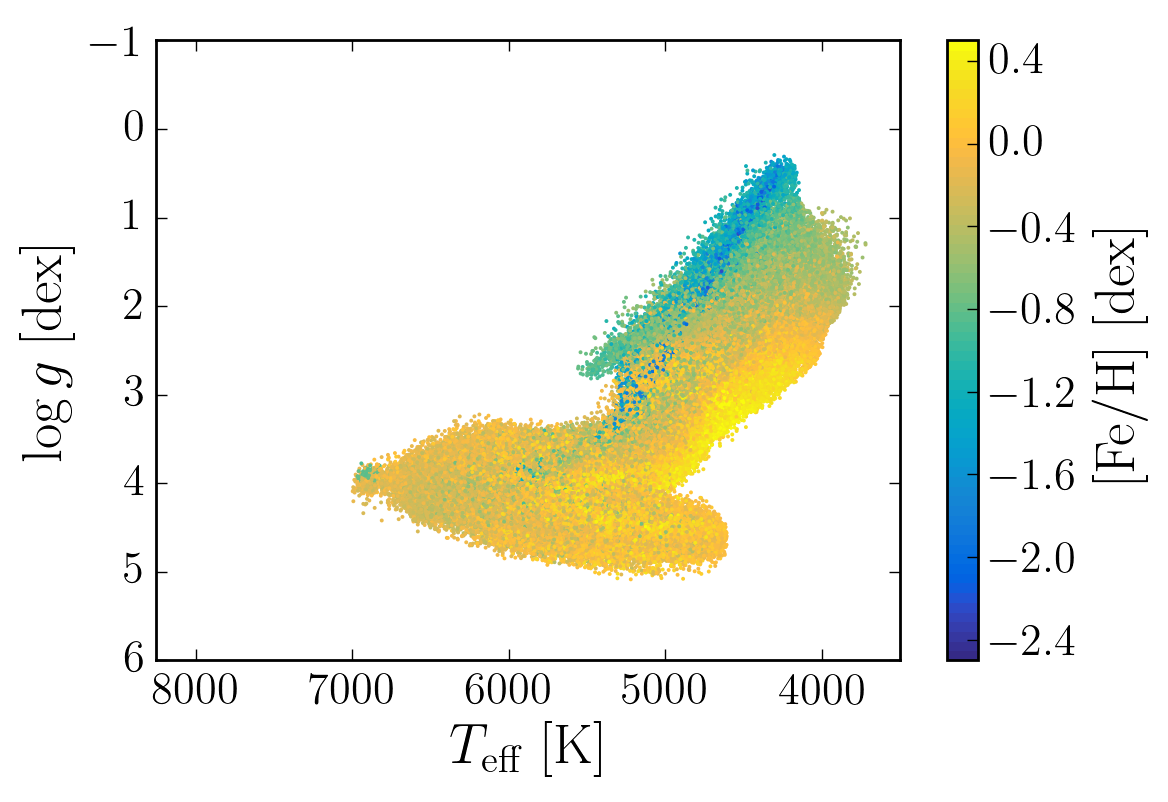

In [10]:
# Let's just take a look at the HRD
kwargs = dict(cmap=parula, s=2, lw=0.0, vmin=-2.5, vmax=0.5, rasterized=True)
f, ax1 = plt.subplots()
good = cannon['flag_cannon'] == 0
s1 = ax1.scatter(cannon['Teff_cannon'][good],cannon['Logg_cannon'][good],c=cannon['Feh_cannon'][good],**kwargs)
ax1.set_xlim(8250,3500)
ax1.set_ylim(6,-1)
c1 = plt.colorbar(s1,ax=ax1)
ax1.set_xlabel(r'$T_\mathrm{eff}~\mathrm{[K]}$')
ax1.set_ylabel(r'$\log g~\mathrm{[dex]}$')
c1.set_label(r'$\mathrm{[Fe/H]~[dex]}$')

In [ ]:
def ab_scatter(X, Y, ax=plt.gca, **kwargs):
    """
    This function gives back a scatter plot
    
    """

    c = kwargs.get('c',parula_zero)
    s = kwargs.get('s',2)
    s1 = ax.scatter(X,Y,c=c,s=s,alpha=0.5,rasterized=True)
    
    return ax

def ab_dens2d(X, Y, ax=plt.gca, min_per_bin=5, max_per_bin=False, zeroslines=True, interimlines=True, colorbar=True, **kwargs):
    """
    This function gives back a 2D density plot 
    of the data put in as X and Y with 
    all points as scatter below certain density
    
    """
    
    #first make sure to only use finite X and Y values
    XY_finite = (np.isfinite(X) & np.isfinite(Y))
    X = X[XY_finite]
    Y = Y[XY_finite]
    
    # General kwargs:
    xlabel = kwargs.get('xlabel','')
    ylabel = kwargs.get('ylabel', r'$\mathrm{[X/Fes]~[dex]}$')
    xlim   = kwargs.get('xlim', (-3.0,0.65))
    ylim   = kwargs.get('ylim', (-0.5,1.00))
    cmap = kwargs.get('cmap', parula)
    bins = kwargs.get('bins', (0.05,0.025))
    if np.shape(bins) != ():
        # assuming input in dex
        bins = [np.arange(xlim[0],xlim[1],bins[0]),np.arange(ylim[0],ylim[1],bins[1])]
    
    # plot all points as scatter before density structure is overlaid
    scatter = ab_scatter(X,Y,ax=ax)

    H, xedges, yedges = np.histogram2d(X,Y,bins=bins)
    H=np.rot90(H)
    H=np.flipud(H)
    Hmasked = np.ma.masked_where(H<min_per_bin,H)

    if max_per_bin==False:
        max_per_bin = np.max(H)
    
    dens2d=ax.pcolormesh(xedges,yedges,Hmasked,cmap=cmap,vmin=min_per_bin,vmax=max_per_bin)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    xticks = kwargs.get('xticks',ax.get_xticks())
    ax.set_xticks(xticks)
    
    if zeroslines == True:
        ax.axhline(0,c='k',lw=0.5)
        ax.axvline(0,c='k',lw=0.5)
        
    if interimlines == True:
        ax.axhline(0.1,c='k',linestyle='--')
        ax.axhline(0.2,c='k',linestyle='--')
        ax.axhline(0.3,c='k',linestyle='--')
        ax.axhline(0.4,c='k',linestyle='--')
        ax.axhline(0.5,c='k',linestyle='--')
        ax.axhline(-0.1,c='k',linestyle='--')
        ax.axhline(-0.2,c='k',linestyle='--')

    if colorbar == True:
        c = plt.colorbar(dens2d,ax=ax)
        c.set_label('Counts')

In [ ]:
interimlines = False

mode = [ 'Li', 'C', 'O', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni','Cu', 'Zn', 'Rb', 'Sr', 'Y', 'Zr', 'Mo', 'Ru', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Eu']

for each_mode in mode:

    print(each_mode)
    
    f, ax = plt.subplots(figsize = (10,5))

    if each_mode in ['Li','Sm','Sr']:
        ylim = (-2,3)
        bins = (0.05,0.025*15./3.)
    elif each_mode in ['Ba','Y','O','Zr']:
        ylim=(-1.50,2.00)
        bins=(0.05,0.025*7./3.)
    elif each_mode in ['K','La','Rb','Ru','V','Zn','Mo']:
        ylim=(-1.00,1.50)
        bins=(0.05,0.025*5./3.)
    elif each_mode in ['C','Ca','Co','Cr','Eu','Ce','Cu','Mg','Na','Mn','Nd','Si','Ti']:
        ylim=(-1.00,1.00)
        bins=(0.05,0.025*4./3.)
    elif each_mode in ['C','Ca','Co','Cr','Eu','Ce','Cu','Mg','Na','Mn','Nd','Si','Ti']:
        ylim=(-0.25,0.50)
        bins=(0.05,0.025*4./3.)        
    else:
        ylim = (-0.5,1.00)
        bins =(0.05,0.025)
        
    min_snr = 0
    criterium = (cannon['flag_'+each_mode+'_abund_cannon'] == 0) & np.isfinite(cannon[each_mode+'_abund_cannon']) & (cannon['snr_c2_iraf'] > min_snr) & (cannon['red_flag']==0)
    criterium_name = r'S/N $>$ '+str(min_snr)
    criterium_short = '_snr'+str(min_snr)

#     red_flag
#   0 for no flags
# + 1 for bad wavelength solution in ccd_1, 
# + 2 for bad wavelength solution in ccd_2, 
# + 4 for bad wavelength solution in ccd_3, 
# + 8 for bad wavelength solution in ccd_4,
# +16 for molecfit fail in ccd_3
# +32 for molecfit fail in ccd_4
# +64 for twilight flat
    
    ab_dens2d(
        ax=ax,
        min_per_bin = 25,
        xlim=(-3.0,0.65),
        ylim=ylim,
        bins=bins,
        X = cannon['Feh_cannon'][criterium],
        Y = cannon[each_mode+'_abund_cannon'][criterium],
        xlabel='$\mathrm{[Fe/H]~[dex]}$',
        ylabel='$\mathrm{['+each_mode+'/Fe]~[dex]}$',
        interimlines=interimlines
        );
    nstars = ax.scatter([-9999,-9999], [-9999,-9999], color='k', s=5, label=str(len(cannon[each_mode+'_abund_cannon'][criterium]))+' spectra \n '+criterium_name)
    ax.legend([nstars],[str(len(cannon[each_mode+'_abund_cannon'][criterium]))+' spectra \n w/ '+criterium_name],frameon=True, scatterpoints=1, loc='upper left',handletextpad=0.1)
    plt.tight_layout()
    plt.savefig('/shared-storage/buder/svn-repos/trunk/GALAH/CANNON/'+reduction_DR+'/'+version_cannon+'/fits_files/sobject_iraf_'+version_cannon.lower()+'_'+each_mode+'_Fe'+criterium_short+'_flag0.pdf',dpi=600)

Li
C
O
Na
Mg
Al
Si
K
Ca
Sc
Ti
V
Cr
Mn
Co
Ni
Cu
Zn
Rb
Sr
Y


/usr/lib64/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Zr
Mo
Ru
Ba
La
Ce
Nd
Sm
Eu


In [ ]:
# with PdfPages('CANNON/'+DR+'/'+output+'/diagnostic_plots/'+output+subset+'_overview.pdf') as pdf:
    
#     snr0   = (galah['flag_cannon'] == 0)
#     snr50  = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] >  50)
#     snr100 = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] > 100)

#     f,(ax1,ax2,ax3) = plt.subplots(3,figsize=(15,10))
#     s1 = ax1.scatter(galah['teff_cannon'][snr0],galah['logg_cannon'][snr0],c=galah['feh_cannon'][snr0],vmin=-1.0,vmax = 0.75,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax1.set_xlim(7000,4500);
#     ax1.set_ylim(5.5,2.5);
#     ax1.text(6875,5.25,r'$S/N > 0$',fontsize = 20);
#     s2 = ax2.scatter(galah['teff_cannon'][snr50],galah['logg_cannon'][snr50],c=galah['feh_cannon'][snr50],vmin=-1.0,vmax = 0.75,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax2.set_xlim(7000,4500);
#     ax2.set_ylim(5.5,2.5);
#     ax2.text(6875,5.25,r'$S/N > 50$',fontsize = 20);
#     s3 = ax3.scatter(galah['teff_cannon'][snr100],galah['logg_cannon'][snr100],c=galah['feh_cannon'][snr100],vmin=-1.0,vmax = 0.75,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax3.set_xlim(7000,4500);
#     ax3.set_ylim(5.5,2.5);
#     ax3.text(6875,5.25,r'$S/N > 100$',fontsize = 20);
#     ax1.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax2.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax3.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax1.set_ylabel(r'$\log (g)$ [dex]');
#     ax2.set_ylabel(r'$\log (g)$ [dex]');
#     ax3.set_ylabel(r'$\log (g)$ [dex]');
#     c1=plt.colorbar(s1,ax=ax1)
#     c2=plt.colorbar(s2,ax=ax2)
#     c3=plt.colorbar(s3,ax=ax3)
#     c1.set_label(r'[Fe/H] [dex]')
#     c2.set_label(r'[Fe/H] [dex]')
#     c3.set_label(r'[Fe/H] [dex]')
#     plt.tight_layout()
#     #plt.savefig('CANNON/'+DR+'/'+output+'/diagnostic_plots/HRD_snr.png',dpi=600)
#     pdf.savefig(dpi=600)
#     plt.close()

 
#     snr0   = (galah['flag_cannon'] == 0)
#     snr50  = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] >  50)
#     snr100 = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] > 100)

#     f,(ax1,ax2,ax3) = plt.subplots(3,figsize=(15,10))
#     s1 = ax1.scatter(galah['teff_cannon'][snr0],galah['vsini_cannon'][snr0],c=galah['vmic_cannon'][snr0],vmin=0,vmax = 3,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax1.set_xlim(7000,4500);
#     ax1.set_ylim(0,30);
#     ax1.text(6875,2.5,r'$S/N > 0$',fontsize = 20);
#     s2 = ax2.scatter(galah['teff_cannon'][snr50],galah['vsini_cannon'][snr50],c=galah['vmic_cannon'][snr50],vmin=0,vmax = 3,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax2.set_xlim(7000,4500);
#     ax2.set_ylim(0,30);
#     ax2.text(6875,2.5,r'$S/N > 50$',fontsize = 20);
#     s3 = ax3.scatter(galah['teff_cannon'][snr100],galah['vsini_cannon'][snr100],c=galah['vmic_cannon'][snr100],vmin=0,vmax = 3,lw=0,s=3,cmap=parula_r,rasterized=True);
#     ax3.set_xlim(7000,4500);
#     ax3.set_ylim(0,30);
#     ax3.text(6875,2.5,r'$S/N > 100$',fontsize = 20);
#     ax1.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax2.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax3.set_xlabel(r'$T_\text{eff}$ [K]');
#     ax1.set_ylabel(r'$v_{\sin i}$ [km/s]');
#     ax2.set_ylabel(r'$v_{\sin i}$ [km/s]');
#     ax3.set_ylabel(r'$v_{\sin i}$ [km/s]');
#     c1=plt.colorbar(s1,ax=ax1)
#     c2=plt.colorbar(s2,ax=ax2)
#     c3=plt.colorbar(s3,ax=ax3)
#     c1.set_label(r'$v_\text{mic}$ [km/s]')
#     c2.set_label(r'$v_\text{mic}$ [km/s]')
#     c3.set_label(r'$v_\text{mic}$ [km/s]')
#     plt.tight_layout()
#     #plt.savefig('CANNON/'+DR+'/'+output+'/diagnostic_plots/Vsini_vmic_snr.png',dpi=300)
#     pdf.savefig(dpi=300)
#     plt.close()

#     for xfe_case in range(len(possible_abundances)):
#         found_label = np.where(possible_abundances[xfe_case]==labels)[0]
#         xfe = str.lower(possible_abundances[xfe_case])
#         if len(found_label)>0:

#             snr0   = (galah['flag_cannon'] == 0) & (galah['flag_'+xfe+'_abund_cannon'] == 0)
#             snr50  = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] >  50) & (galah['flag_'+xfe+'_abund_cannon'] == 0)
#             snr100 = (galah['flag_cannon'] == 0) & (galah['snr2_c2_iraf'] > 100) & (galah['flag_'+xfe+'_abund_cannon'] == 0)

#             f,(ax1,ax2,ax3) = plt.subplots(3,figsize=(15,10))
#             s1 = ax1.scatter(galah['feh_cannon'][snr0],galah[xfe+'_abund_cannon'][snr0],c=galah['e_'+xfe+'_abund_cannon'][snr0],vmin=precision_snr(600,*cannon_precision_function[found_label[0]]),vmax = precision_snr(0,*cannon_precision_function[found_label[0]]),lw=0,s=3,cmap=parula_r,rasterized=True);
#             ax1.set_xlim(-1.0,0.75);
#             if xfe=='o':
#                 ax1.text(-0.95,-0.75,r'$S/N > 0$',fontsize = 20)
#                 ax1.set_ylim(-1,2);
#             else:
#                 ax1.text(-0.95,-0.825,r'$S/N > 0$',fontsize = 20)
#                 ax1.set_ylim(-1,1.0);
#             s2 = ax2.scatter(galah['feh_cannon'][snr50],galah[xfe+'_abund_cannon'][snr50],c=galah['e_'+xfe+'_abund_cannon'][snr50],vmin=precision_snr(600,*cannon_precision_function[found_label[0]]),vmax = precision_snr(0,*cannon_precision_function[found_label[0]]),lw=0,s=3,cmap=parula_r,rasterized=True);
#             ax2.set_xlim(-1.0,0.75);
#             if xfe=='o':
#                 ax2.text(-0.95,-0.75,r'$S/N > 50$',fontsize = 20)
#                 ax2.set_ylim(-1,2);
#             else:
#                 ax2.text(-0.95,-0.825,r'$S/N > 50$',fontsize = 20)
#                 ax2.set_ylim(-1,1.0);
#             s3 = ax3.scatter(galah['feh_cannon'][snr100],galah[xfe+'_abund_cannon'][snr100],c=galah['e_'+xfe+'_abund_cannon'][snr100],vmin=precision_snr(600,*cannon_precision_function[found_label[0]]),vmax = precision_snr(0,*cannon_precision_function[found_label[0]]),lw=0,s=3,cmap=parula_r,rasterized=True);
#             ax3.set_xlim(-1.0,0.75);
#             ax3.set_ylim(-1,1.0);
#             if xfe=='o':
#                 ax3.text(-0.95,-0.75,r'$S/N > 100$',fontsize = 20)
#                 ax3.set_ylim(-1,2); 
#             else:
#                 ax3.text(-0.95,-0.825,r'$S/N > 100$',fontsize = 20)
#                 ax3.set_ylim(-1,1.0);



#             ax1.set_xlabel(r'[Fe/H] [dex]');
#             ax2.set_xlabel(r'[Fe/H] [dex]');
#             ax3.set_xlabel(r'[Fe/H] [dex]');
#             ax1.set_ylabel(r'['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             ax2.set_ylabel(r'['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             ax3.set_ylabel(r'['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             c1=plt.colorbar(s1,ax=ax1)
#             c2=plt.colorbar(s2,ax=ax2)
#             c3=plt.colorbar(s3,ax=ax3)
#             c1.set_label(r'$\Delta$ ['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             c2.set_label(r'$\Delta$ ['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             c3.set_label(r'$\Delta$ ['+possible_abundances[xfe_case]+'/Fe] [dex]');
#             plt.tight_layout()
#             plt.savefig('CANNON/'+DR+'/'+output+'/diagnostic_plots/Feh_'+possible_abundances[xfe_case]+'.png',dpi=300)
#             pdf.savefig(dpi=300)
#             plt.close()